# **Preparation**

Importing Data and Inspection

In [2]:
#Import library
import pandas as pd
import numpy as np

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')
print('Top 5 rows:')
display(df.head())

#Data info
print('Shape dataset:')
display(df.shape)

print('\nDataset info:')
display(df.info())

print('\nStatistic info:')
display(df.describe())

Top 5 rows:


,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


Shape dataset:


(9994, 20)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9994 non-null   object        
 1   Customer_ID     9994 non-null   object        
 2   Postal_Code     9994 non-null   int64         
 3   Product_ID      9994 non-null   object        
 4   Sales           9994 non-null   float64       
 5   Quantity        9994 non-null   int64         
 6   Discount        9994 non-null   float64       
 7   Profit          9994 non-null   float64       
 8   Category        9994 non-null   object        
 9   Sub-Category    9994 non-null   object        
 10  Product_Name    9994 non-null   object        
 11  Order_Date      9994 non-null   datetime64[ns]
 12  Ship_Date       9994 non-null   datetime64[ns]
 13  Ship_Mode       9994 non-null   object        
 14  Customer_Name   9994 non-null   object   

None


Statistic info:


,Postal_Code,Sales,Quantity,Discount,Profit,Order_Date,Ship_Date
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994
mean,55190.371023,229.858001,3.789574,0.156203,28.656896,2019-04-30 17:41:20.448268800,2019-05-04 16:42:15.921553152
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2017-01-03 00:00:00,2017-01-07 00:00:00
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,2018-05-23 00:00:00,2018-05-27 00:00:00
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,2019-06-26 00:00:00,2019-06-29 00:00:00
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,2020-05-14 00:00:00,2020-05-18 00:00:00
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2020-12-30 00:00:00,2021-01-05 00:00:00
std,32063.704510,623.245101,2.225110,0.206452,234.260108,NaN,NaN


# **Exploratory Data Analysis (EDA)**

**Overview Data of Each Year**


In [3]:
import datetime
import pandas as pd
import numpy as np

#Convert 'Order_Date' to datetime and extract year
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year

# Group by 'Year' and calculate sum of 'Quantity', 'Sales' and 'Profit'
df_year = df.groupby('Year').agg({'Quantity': 'sum', 'Sales': 'sum', 'Profit': 'sum'})
display(df_year)

,Quantity,Sales,Profit
Year,,,
2017,7581,484247.4981,49543.9741
2018,7979,470532.5090,61618.6037
2019,9837,609205.5980,81795.1743
2020,12476,733215.2552,93439.2696


**Trends of Total Sales and Total Profit**

<Figure size 640x480 with 0 Axes>

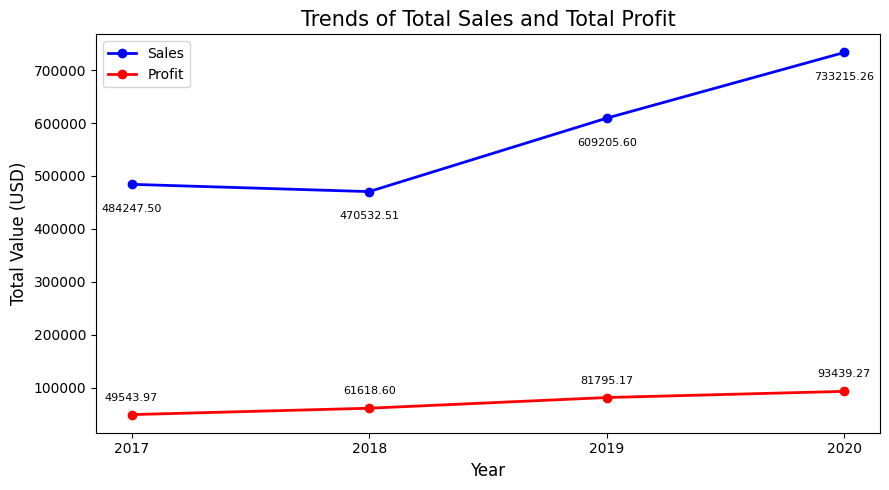

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Convert 'Order_Date' to datetime and extract year
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year

#Group by 'Year' and calculate sum of 'Sales' and 'Profit'
df_grouped = df.groupby(['Year']).agg({'Sales': 'sum', 'Profit': 'sum'})

#Create the line plot
plt.clf()
df_grouped.plot(
    kind='line',
    color=['blue', 'red'],
    marker='o',
    linewidth=2,
    figsize=(9, 5)
)

#Customize the plot
plt.title('Trends of Total Sales and Total Profit', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(df_grouped.index.astype(int), rotation=0) #Format tick on x-axis

for i, row in df_grouped.iterrows():  #Annotate total value of each point
    plt.annotate(f'{row["Sales"]:.2f}', (i, row["Sales"]), textcoords="offset points", xytext=(0,-20), ha='center',fontsize=8)
    plt.annotate(f'{row["Profit"]:.2f}', (i, row["Profit"]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

**Outlier Detection in Profit Distribution**

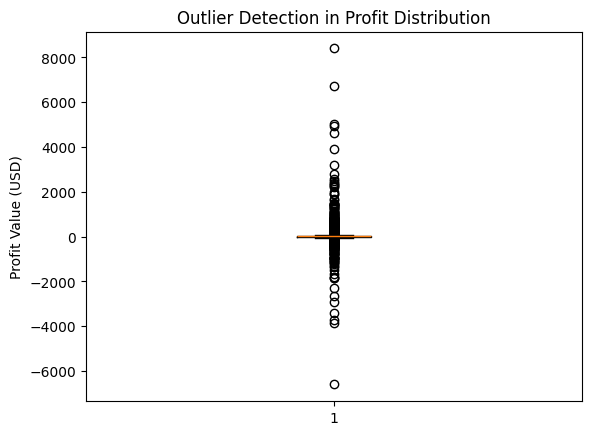

In [26]:
import matplotlib.pyplot as plt

#Define the IQR
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

#Determine lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Outlier identification
outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

#Box plot
plt.boxplot(df['Profit'])
plt.title('Outlier Detection in Profit Distribution')
plt.ylabel('Profit Value (USD)')
plt.show()

**Top 10 Most Profitable Products**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

# Grouping data based on Product_Name and Category, and counting total Quantity
grouped_df = df.groupby(['Product_Name', 'Category'])['Profit'].sum().reset_index()

# Sorting data based on Quantity
top_10_profit = grouped_df.sort_values('Profit', ascending=False).head(10)

display(top_10_profit)

,Product_Name,Category,Profit
399,Canon imageCLASS 2200 Advanced Copier,Technology,25199.9280
638,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,7753.0390
791,Hewlett Packard LaserJet 3310 Copier,Technology,6983.8836
395,Canon PC1060 Personal Laser Copier,Technology,4570.9347
983,Logitech G19 Programmable Gaming Keyboard,Technology,4425.3432
773,HP Designjet T520 Inkjet Large Format Printer ...,Technology,4094.9766
162,Ativa V4110MDD Micro-Cut Shredder,Technology,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,3717.9714
881,Ibico EPK-21 Electric Binding System,Office Supplies,3345.2823
1807,Zebra ZM400 Thermal Label Printer,Technology,3343.5360


**Total Profit of Product Category**

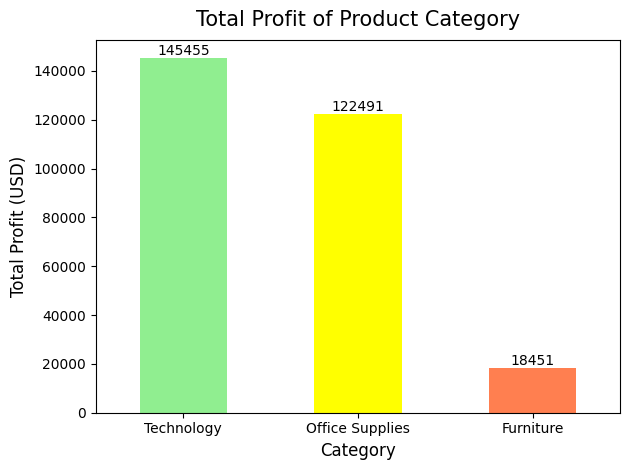

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Grouping data based on category and counting total profit
grouped_df = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

#Create bar chart
plt.clf()
ax = grouped_df.plot(kind='bar', color=['lightgreen', 'yellow', 'coral'])  #Object Axes
plt.title('Total Profit of Product Category', loc='center', pad=10, fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Profit Proportion of Product Category**

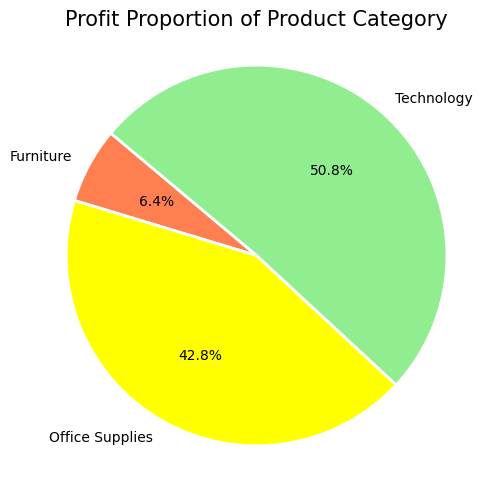

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#Profit proportion of product category
profit_by_category = df.groupby('Category')['Profit'].sum()
total_profit = profit_by_category.sum()
profit_proportion = profit_by_category / total_profit

#Create pie chart
plt.figure(figsize=(5,5))
plt.pie(profit_proportion, labels=profit_proportion.index, autopct='%1.1f%%', startangle=140,
        colors = ['coral', 'yellow', 'lightgreen'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True})
plt.title('Profit Proportion of Product Category', fontsize=15, pad=5)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Top 10 Best-Selling Products based on Quantity**

In [9]:
import pandas as pd

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Grouping data based on Product_Name and Category, and counting total Quantity
grouped_df = df.groupby(['Product_Name', 'Category'])['Quantity'].sum().reset_index()

#Sorting data based on Quantity
top_10_products = grouped_df.sort_values('Quantity', ascending=False).head(10)

display(top_10_products)

,Product_Name,Category,Quantity
1474,Staples,Office Supplies,215
1468,Staple envelope,Office Supplies,170
530,Easy-staple paper,Office Supplies,150
1475,Staples in misc. colors,Office Supplies,86
1009,Logitech P710e Mobile Speakerphone,Technology,75
926,KI Adjustable-Height Table,Furniture,74
487,DAX Wood Document Frame,Furniture,73
255,Avery Non-Stick Binders,Office Supplies,71
1486,Storex Dura Pro Binders,Office Supplies,71
1635,Xerox 1881,Office Supplies,70


**Total Quantity of Product Category**

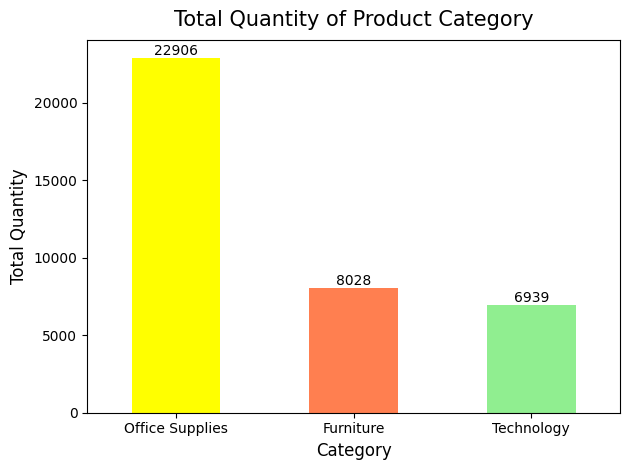

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Create bar chart
#Grouping data based on category and counting total profit
plt.clf()
grouped_df=df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

ax = grouped_df.plot(kind='bar', color=['yellow', 'coral','lightgreen'])  #Object Axes

plt.title('Total Quantity of Product Category', loc='center',pad=10,fontsize=15)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)

plt.ylim(ymin=0)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Quantity Proportion of Product Category**

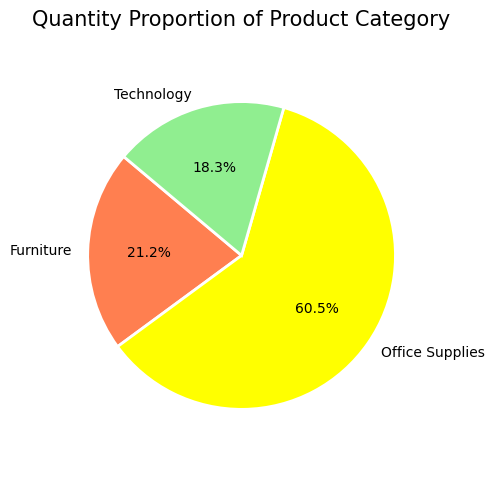

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Quantity  proportion of product category
Quantity_by_category = df.groupby('Category')['Quantity'].sum()
total_Quantity  = Quantity_by_category.sum()
Quantity_proportion = Quantity_by_category / total_Quantity

# Buat pie chart
plt.figure(figsize=(5,5))
plt.pie(Quantity_proportion, labels=Quantity_proportion.index, autopct='%1.1f%%', startangle=140,
        colors = ['coral', 'yellow', 'lightgreen'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True})
plt.title('Quantity Proportion of Product Category', fontsize=15, pad=5)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Annual Comparison of Total Sales and Total Profit for Office Supplies**

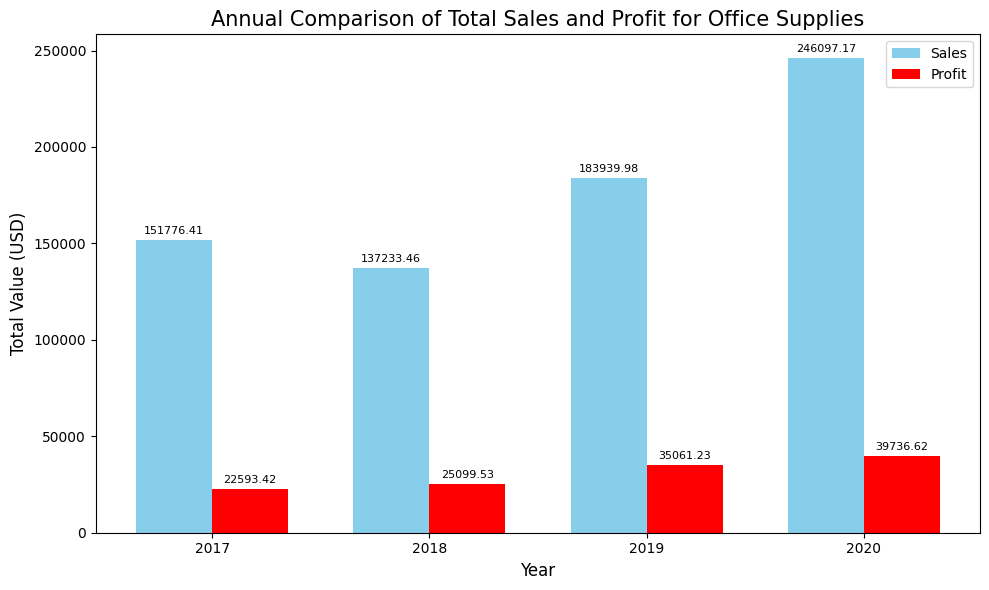

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Extract Year from Order_Date
df['Year'] = df['Order_Date'].dt.year

#Filtering data for 'Office Supplies' Category
df_OfficeSupplies = df[df['Category'] == 'Office Supplies']

#Grouping data based on Year and aggregating Sales and Profit
grouped_df = df_OfficeSupplies.groupby(['Year']).agg({'Sales': 'sum', 'Profit': 'sum'})

#Create Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes object

bar_width = 0.35  # Width of the bars

#Create bars for Sales
sales_bars = ax.bar(grouped_df.index - bar_width/2, grouped_df['Sales'], bar_width, label='Sales', color='skyblue')

#Create bars for Profit
profit_bars = ax.bar(grouped_df.index + bar_width/2, grouped_df['Profit'], bar_width, label='Profit', color='red')

#Annotate Sales bars
for bar in sales_bars:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom', fontsize=8, xytext=(0, 3),
                textcoords='offset points')

#Annotate Profit bars
for bar in profit_bars:
    yval = bar.get_height()
    ax.annotate(f'{yval:.2f}', (bar.get_x() + bar.get_width() / 2, yval),
                ha='center', va='bottom', fontsize=8, xytext=(0, 3),
                textcoords='offset points')

#Customize the plot
ax.set_title('Annual Comparison of Total Sales and Profit for Office Supplies', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Value (USD)', fontsize=12)
ax.set_xticks(grouped_df.index)
ax.legend()
plt.tight_layout()
plt.show()

**Total Discount of Product Category**

Counting discount

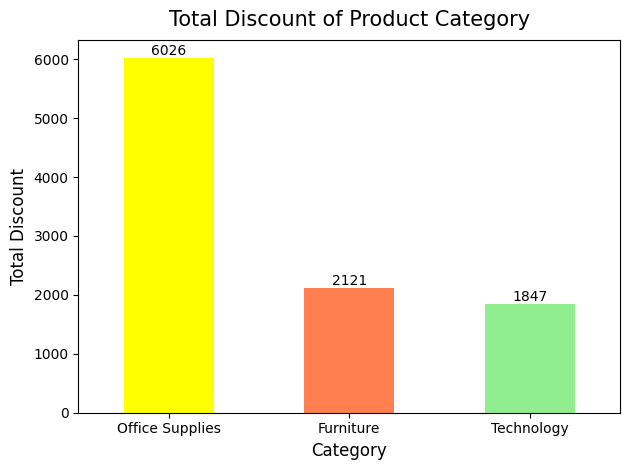

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Create Bar Chart
#Grouping data based on category and counting total profit
plt.clf()
grouped_df=df.groupby('Category')['Discount'].count().sort_values(ascending=False)

ax = grouped_df.plot(kind='bar',color=['yellow', 'coral','lightgreen'])  #Object Axes

plt.title('Total Discount of Product Category', loc='center',pad=10,fontsize=15)

plt.xlabel('Category',fontsize=12)
plt.ylabel('Total Discount', fontsize=12)

plt.ylim(ymin=0)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Monthly Profit Trends in 2020**

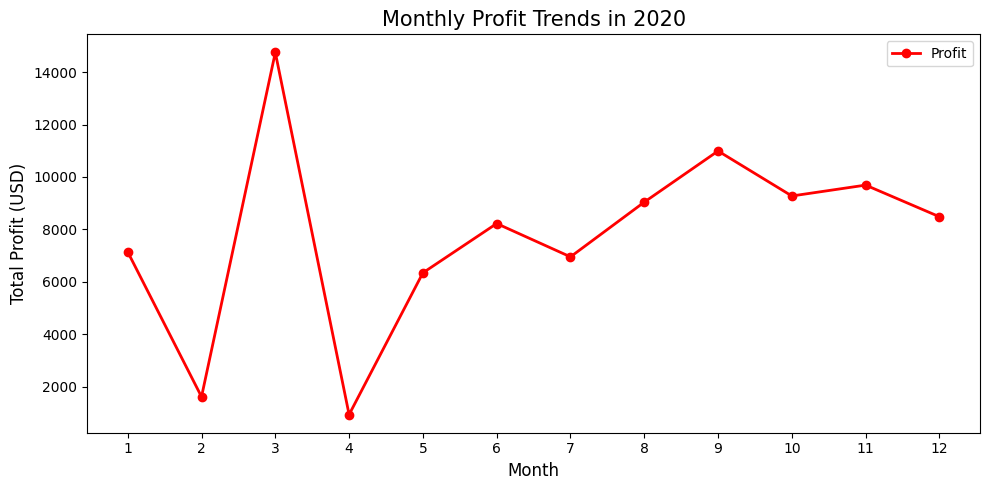

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Convert 'Order_Date' to datetime, extract year and month
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

#Filter data for the year 2020
df_2020 = df[df['Year'] == 2020]

#Group by Month and calculate the sum of Profit
monthly_profit_2020 = df_2020.groupby(['Month']).agg({'Profit':'sum'})

#Create the line plot
monthly_profit_2020.plot(
    kind='line',
    color='red',
    marker='o',
    linewidth=2,
    figsize=(10, 5)
)

#Customize the plot
plt.title('Monthly Profit Trends in 2020', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)

plt.xticks(range(1, 13))  # Set x-axis ticks for each month

plt.tight_layout()
plt.show()

**Monthly Discount Trends in 2020**

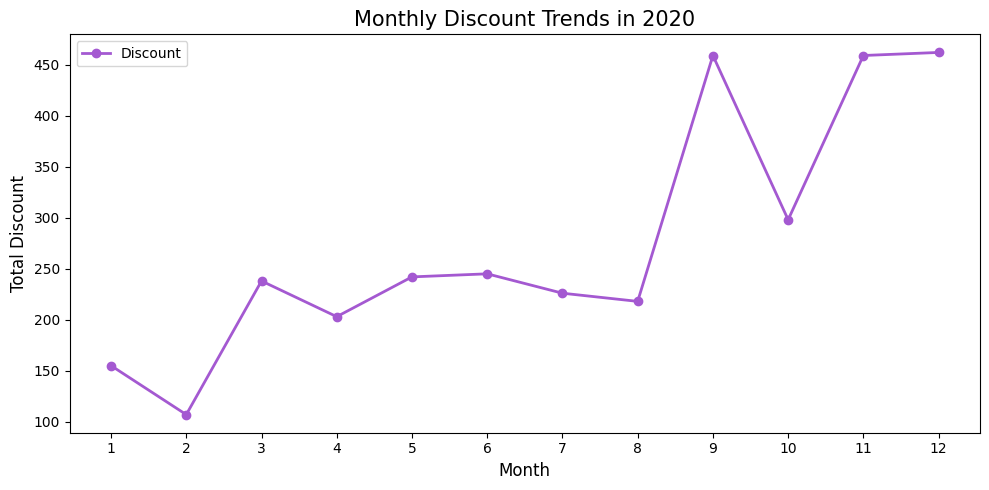

In [15]:
#Import library
import pandas as pd

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Convert 'Order_Date' to datetime, extract year and month
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

#Filter data for the year 2020
df_2020 = df[df['Year'] == 2020]

#Group by Month and calculate the sum of Profit
monthly_discount_2020 = df_2020.groupby(['Month']).agg({'Discount':'count'})

#Create the line plot
monthly_discount_2020.plot(
    kind='line',
    color='#A459D1',
    marker='o',
    linewidth=2,
    figsize=(10, 5)
)

#Customize the plot
plt.title('Monthly Discount Trends in 2020', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Discount', fontsize=12)
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.tight_layout()
plt.show()

**The Discount Impact for Sales**

Analysis of discount impact for sales value using regression

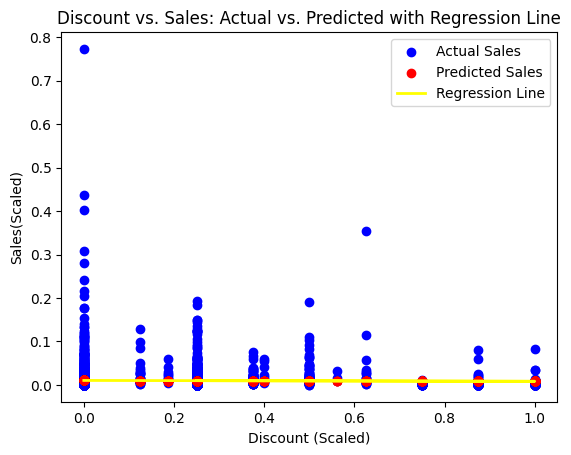

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Select the independent variable (Discount) and the dependent variable (Sales)
X = df[['Discount']]
y = df['Sales']

#Scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

#Create and train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

#Make predictions on the test set
y_pred = reg.predict(X_test)

#Plot the relationship between Discount and Predicted Sales
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales')

#Create the regression line
plt.plot(X_test, reg.predict(X_test), color='yellow', linewidth=2, label='Regression Line')

plt.xlabel('Discount (Scaled)')
plt.ylabel('Sales(Scaled)')
plt.title('Discount vs. Sales: Actual vs. Predicted with Regression Line')
plt.legend()
plt.show()

In [17]:
(df[['Discount', 'Sales']].corr())

,Discount,Sales
Discount,1.00000,-0.02819
Sales,-0.02819,1.00000


**Customer Segmentation Using KMeans**

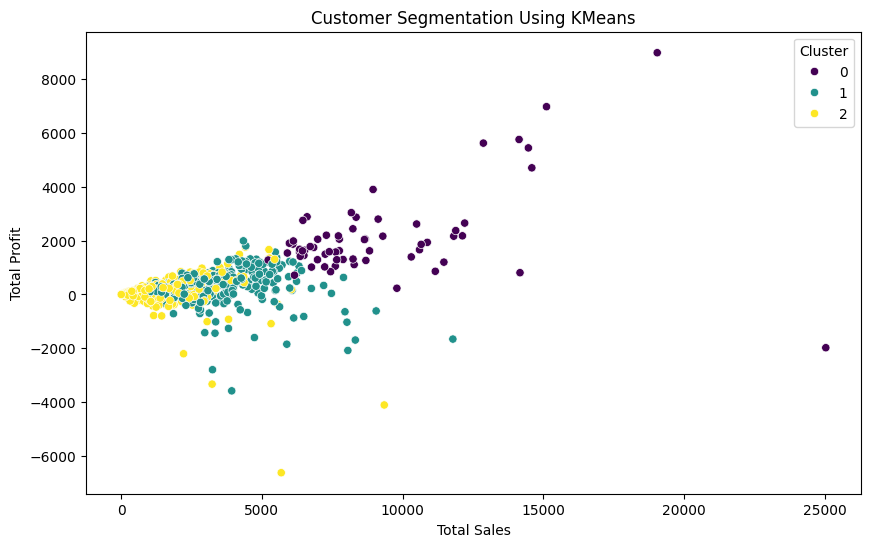

,Sales,Quantity,Profit,Frequency,Customer Count
Cluster,,,,,
0,9182.107395,77.349206,2133.640149,8.396825,63
1,3413.264137,64.768254,307.317271,8.314286,315
2,1550.722630,30.356627,132.946390,4.484337,415


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/content/SuperStore.xlsx')

# Data aggregations based on Customer_ID
customer_data = df.groupby('Customer_ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Order_ID': 'nunique'  #Order freq
}).rename(columns={'Order_ID': 'Frequency'})

#Handling missing value (if any)
customer_data.fillna(0, inplace=True)

#Scalling feature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

#KMeans implementation
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

#Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation Using KMeans')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

#Customer segment analysis
cluster_summary = customer_data.groupby('Cluster').agg({
    'Sales': 'mean',
    'Quantity': 'mean',
    'Profit': 'mean',
    'Frequency': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Customer Count'})

display(cluster_summary)

**Elbow Method for Cluster Value**

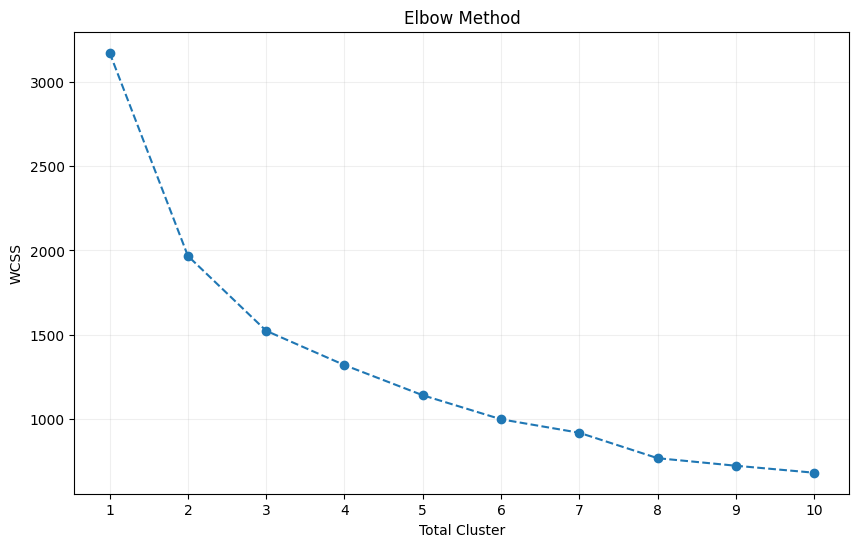

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('/content/SuperStore.xlsx')

#Aggregate data by customer
customer_data = df.groupby('Customer_ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Order_ID': 'nunique'
}).rename(columns={'Order_ID': 'Frequency'})

#Handle missing values (if any)
customer_data.fillna(0, inplace=True)

#Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

#Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):  #Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  #inertia_ is WCSS

#Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Total Cluster')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.2)
plt.show()